# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/mart_codeit/mart_data.csv')

In [3]:
plt.rc('font', family='NanumGothic')

In [4]:
df.head(2)

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,??,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,??,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11


In [5]:
pd.set_option('display.max_columns', None)

### 결측치, 불필요한 컬럼 또는 데이터 타입 확인

In [6]:
df.isna().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [8]:
df.shape

(2240, 23)

In [9]:
# 2240 열중에서 24개의 결측치 제거
df = df.dropna()

In [10]:
# revenue 컬럼 불필요하므로 제거
df = df.iloc[:, :-1]

In [11]:
df.shape

(2216, 22)

### 결혼상태 컬럼이 한글로 되어 있지 않아서 따로 추출해서 다시 데이터프레임에 붙임

In [18]:
marry = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/mart_codeit/marriage.csv')

In [19]:
marry = marry.dropna()

In [20]:
marry = marry['marital_status']

In [21]:
marry.shape

(2216,)

In [22]:
marry.head(2)

0    미혼
1    미혼
Name: marital_status, dtype: object

In [23]:
index_m = df.columns.get_loc('marital_status')

In [24]:
df.insert(loc=index_m + 1, column='matrimony', value=marry)

In [25]:
df.head(2)

,ID,signup_ym,birth_year,annual_income,marital_status,matrimony,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age
0,5524,2020-12,1965,75579400.0,??,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,59
1,2174,2022-06,1962,60247200.0,??,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,62


In [26]:
df = df.drop('marital_status', axis=1)

In [27]:
df.head(4)

,ID,signup_ym,birth_year,annual_income,matrimony,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,59
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,62
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,51
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,32


In [28]:
df['age'] = 2024 - df['birth_year']

In [32]:
import seaborn as sns

In [45]:
df_matrimony_na = df[df[['matrimony']].isna().any(axis=1)]
print(df_matrimony_na)

Empty DataFrame
Columns: [ID, signup_ym, birth_year, annual_income, matrimony, children, recency, amount_alcohol, amount_fruit, amount_meat, amount_fish, amount_snack, amount_general, num_purchase_web, num_purchase_store, num_purchase_discount, promotion_1, promotion_2, promotion_3, promotion_4, promotion_5, promotion_6, age]
Index: []


In [46]:
plt.rc('font', family='Malgun Gothic')

Text(0, 0.5, '고객 수')

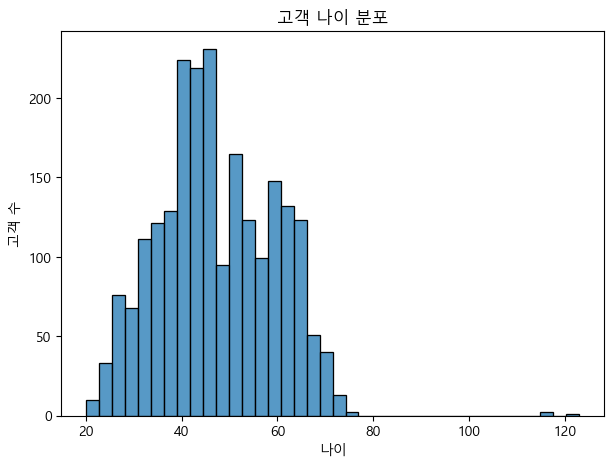

In [47]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.histplot(data=df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이')
plt.ylabel('고객 수')

### 100살이 넘는 고객이 존재 --> 삭제

In [50]:
df.sort_values(by='age', ascending=False)

,ID,signup_ym,birth_year,annual_income,matrimony,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age
1950,6663,2021-10,1948,66483300.0,미혼,0,96,187200,0,9100,0,0,7800,3,4,1,0,0,0,0,0,0,76
424,6932,2021-07,1949,120935100.0,배우자 있음,0,77,1670500,54600,930800,71500,0,27300,7,5,0,0,0,0,0,1,0,75
1150,1453,2021-10,1951,74766900.0,사별,0,59,955500,52000,237900,67600,26000,39000,9,13,2,0,0,0,0,0,0,73
894,8800,2021-04,1951,63632400.0,이혼,0,53,568100,10400,267800,208000,63700,54600,7,5,2,0,0,1,0,0,1,73
358,6142,2021-11,1951,84594900.0,배우자 있음,0,65,817700,22100,230100,89700,0,10400,5,5,1,0,0,0,0,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,8315,2022-06,2003,45271200.0,미혼,0,65,5200,2600,14300,2600,0,5200,1,2,1,0,0,0,0,0,0,21
995,5184,2022-06,2003,45271200.0,미혼,0,65,5200,2600,14300,2600,0,5200,1,2,1,0,0,0,0,0,0,21
1850,4427,2020-12,2003,108234100.0,미혼,0,56,696800,35100,767000,49400,139100,87100,5,12,1,0,0,1,0,1,1,21
46,9909,2021-02,2004,9750000.0,배우자 있음,0,24,3900,23400,18200,19500,28600,65000,3,3,3,0,0,0,0,0,1,20


In [51]:
df = df[df['age'] < 100]

Text(0, 0.5, '고객 수')

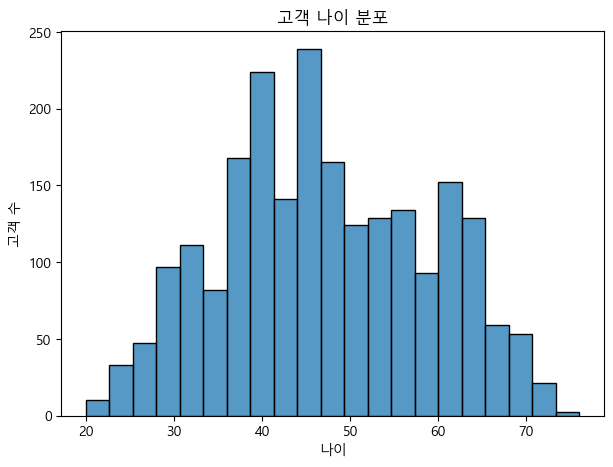

In [53]:
sns.histplot(data=df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이')
plt.ylabel('고객 수')

Text(0, 0.5, '고객 수')

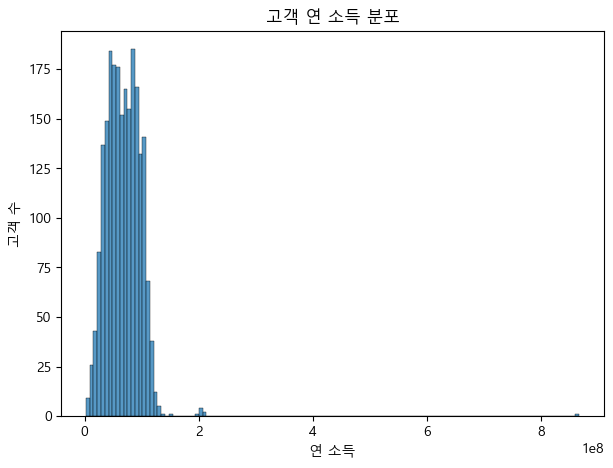

In [30]:
sns.histplot(data=df['annual_income'])
plt.title('고객 연 소득 분포')
plt.xlabel('연 소득')
plt.ylabel('고객 수')

<Axes: xlabel='annual_income'>

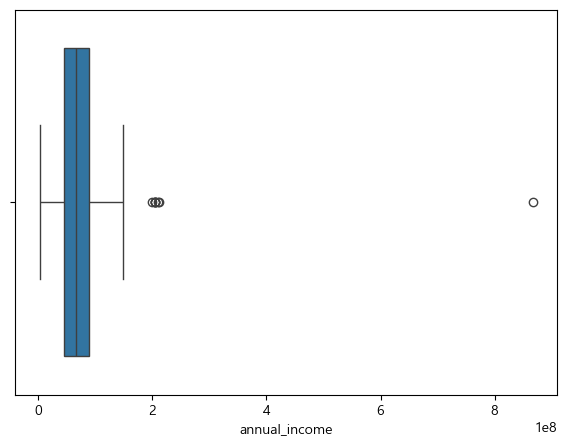

In [54]:
sns.boxplot(data=df, x='annual_income')

In [55]:
df.shape

(2213, 23)

In [56]:
# 총 구매횟수와 총 소비구매액 구해서 새 컬럼으로 insert
amount_total = df['amount_alcohol'] + df['amount_fruit'] + df['amount_meat'] + df['amount_fish'] + df['amount_snack'] + df['amount_general']   

In [57]:
num_purchase = df['num_purchase_web']+df['num_purchase_store']+df['num_purchase_discount']

In [58]:
index_t = df.columns.get_loc('amount_general')

In [59]:
df.insert(loc=index_t + 1, column='amount_total', value=amount_total)

In [60]:
index_tt = df.columns.get_loc('num_purchase_discount')

In [61]:
df.insert(loc=index_tt+1, column='num_purchase_total', value=num_purchase)

In [62]:
df.head(2)

,ID,signup_ym,birth_year,annual_income,matrimony,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,59
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,62


In [63]:
df.to_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/mart_codeit/EDA3_finish.csv', index=False, encoding='utf-8')

In [64]:
df.describe(include='all')

,ID,signup_ym,birth_year,annual_income,matrimony,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age
count,2213.000000,2213,2213.000000,2.213000e+03,2213,2213.000000,2213.000000,2.213000e+03,2213.000000,2.213000e+03,2213.000000,2213.000000,2213.000000,2.213000e+03,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,배우자 있음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,109,NaN,NaN,1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5586.899232,NaN,1976.917307,6.790756e+07,NaN,0.947582,49.007682,3.966997e+05,34221.192951,2.170512e+05,48925.937641,35145.232716,57084.862178,7.891282e+05,4.087664,5.805242,2.325350,12.218256,0.064166,0.013556,0.073656,0.074108,0.072752,0.150474,47.082693
std,3247.819194,NaN,11.700216,3.273218e+07,NaN,0.749297,28.941864,4.384971e+05,51656.711025,2.914940e+05,71192.261181,53411.062876,67209.670117,7.832353e+05,2.741664,3.250752,1.924402,5.860169,0.245104,0.115666,0.261269,0.262005,0.259788,0.357617,11.700216
min,0.000000,NaN,1948.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,2815.000000,NaN,1967.000000,4.581980e+07,NaN,0.000000,24.000000,3.120000e+04,2600.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,8.970000e+04,2.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
50%,5455.000000,NaN,1978.000000,6.678490e+07,NaN,1.000000,49.000000,2.275000e+05,10400.000000,8.840000e+04,15600.000000,10400.000000,31200.000000,5.161000e+05,4.000000,5.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
75%,8420.000000,NaN,1985.000000,8.903310e+07,NaN,1.000000,74.000000,6.565000e+05,42900.000000,3.016000e+05,65000.000000,42900.000000,72800.000000,1.362400e+06,6.000000,8.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
